CUSTOMER CHURN PREDICTION
PPT LINK


https://1drv.ms/p/s!AoWEJ_VTcbRMg2q81z4yU_VIAYis?e=OaOuzy


## **Data**
The term 'data' in a project broadly refers to all the information and documents collected, analyzed, and utilized to plan, execute, monitor, and control the project. This data plays a pivotal role in making informed decisions, managing risks, and ensuring, that the project objective are met. By leveraging this information, project managers can take well-informed decisions and steer the project towards a successful conclusion.

## Importing Python Libraries
To proceed with data analysis and visualization in Python, we need to import some important modules such as pandas, numpy, seaborn, and matplotlib. Pandas is used for data analysis, numpy for calculating n-dimensional arrays, and seaborn and matplotlib for data visualization.

In [ ]:
# Importing Pandas
import pandas as pd
# Importing NumPy
import numpy as np
# Importing Seaborn
import seaborn as sb
# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Machine Learning Libraries
To perform machine learning tasks such as creating regression lines, splitting the lines, and predicting values, we need to import some important modules from the sci-kit-learn library (sklearn). These modules include train_test_split, DecisionTreeClassifier, classification_report, confusion_matrix, RandomForestClassifier.

In [ ]:
# Importing Train Test Split
from sklearn.model_selection import train_test_split
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Importing K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
# Importing K Means Clustering
from sklearn.cluster import KMeans
# Importing XG Boost Classifier and Regressor
from xgboost import XGBClassifier, XGBRegressor
# Importing Accuracy Score, Precision Score, Recall Score, F1 Score, Roc Auc Score, Confusion Matrix, and Classification Report
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

#***Reading the Data Set***
Usually, datasets come in the form of CSV files, but in this case, the file is in Excel format. To read this Excel file in Python, we will use the Pandas library.

In [ ]:
path = '/content/drive/MyDrive/Customer Churn.xlsx'

In [ ]:
# Read the Data Frame
df = pd.read_excel('/content/drive/MyDrive/Customer Churn.xlsx')
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


#***Data Cleaning***
Data cleaning is a meticulous and time-consuming process that requires a keen eye for detail, an in-depth understanding of the domain, and the use of appropriate tools and techniques. It is an indispensable step in any data-related project, as accurate and reliable data is crucial to making informed decisions and achieving precise results in data analysis, machine learning, and other data-driven tasks. Without proper data cleaning, the output of a project can be severely impacted by inaccuracies and inconsistencies in the data. Therefore, it is imperative to invest time and effort in data cleaning to ensure the quality and integrity of the data.

#Dropping Duplicate Values of the Data Set
It is common for a dataset to contain duplicate rows. These duplicates only make the dataset larger and have no value for data analysis. Therefore, it is necessary to identify and drop any duplicate rows in the dataset.

In [ ]:
# Dropping the Duplicate Values
df = df.drop_duplicates()
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


###Top down approach
1.  first we look at the dataset from the birds eye view

#***Getting to know what type of Data Set we have***

To extract information from the dataset, we utilize a specific function after analyzing the data. During this analysis, we also take note of the null value count for each feature and determine the data type of the features present in the dataset.

In [ ]:
# Getting to know our Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            2850 non-null   int64  
 1   Complains                2850 non-null   int64  
 2   Subscription  Length     2850 non-null   int64  
 3   Charge  Amount           2850 non-null   int64  
 4   Seconds of Use           2850 non-null   int64  
 5   Frequency of use         2850 non-null   int64  
 6   Frequency of SMS         2850 non-null   int64  
 7   Distinct Called Numbers  2850 non-null   int64  
 8   Age Group                2850 non-null   int64  
 9   Tariff Plan              2850 non-null   int64  
 10  Status                   2850 non-null   int64  
 11  Age                      2850 non-null   int64  
 12  Customer Value           2850 non-null   float64
 13  Churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)

# **Describing the Data Set**
We can utilize the describe() function to provide an overview of the Data Set and calculate various statistics for each data point in the feature.

In [ ]:
# Describing the Data Set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Call Failure,2850.0,7.802456,7.326172,0.0,1.0000,6.00,12.00,36.00
Complains,2850.0,0.080702,0.272424,0.0,0.0000,0.00,0.00,1.00
Subscription Length,2850.0,32.452982,8.723075,3.0,29.0000,35.00,38.00,47.00
Charge Amount,2850.0,0.974737,1.550618,0.0,0.0000,0.00,2.00,10.00
Seconds of Use,2850.0,4534.243158,4199.712303,0.0,1458.7500,3041.00,6500.00,17090.00
Frequency of use,2850.0,70.484912,57.401512,0.0,28.0000,54.50,96.00,255.00
Frequency of SMS,2850.0,73.789825,112.062397,0.0,7.0000,22.00,88.00,522.00
Distinct Called Numbers,2850.0,23.870526,17.193929,0.0,11.0000,21.00,34.00,97.00
Age Group,2850.0,2.835088,0.893503,1.0,2.0000,3.00,3.00,5.00
Tariff Plan,2850.0,1.080351,0.271883,1.0,1.0000,1.00,1.00,2.00


In [ ]:
cols = df.columns

In [ ]:
print(cols)

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')


In [ ]:
for c in cols:
  print("unique values of ",c,"\n")
print(df[c].unique())

unique values of  Call  Failure 

unique values of  Complains 

unique values of  Subscription  Length 

unique values of  Charge  Amount 

unique values of  Seconds of Use 

unique values of  Frequency of use 

unique values of  Frequency of SMS 

unique values of  Distinct Called Numbers 

unique values of  Age Group 

unique values of  Tariff Plan 

unique values of  Status 

unique values of  Age 

unique values of  Customer Value 

unique values of  Churn 

[0 1]


In [ ]:
df.sort_values(by=cols[-1], ascending=True).head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1734,3,0,32,2,6850,111,273,34,2,2,1,25,1541.745,0
1735,0,0,34,0,3603,77,4,29,2,1,1,25,183.600,0
1736,0,0,33,0,1550,39,40,21,3,1,2,30,223.560,0
1737,3,0,34,0,2665,48,177,24,2,1,1,25,918.585,0


In [ ]:
df.drop(['Age Group'], axis=1)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,17,0,17,1,9237,177,80,42,1,1,55,261.210,0
3097,13,0,18,4,3157,51,38,21,1,1,30,280.320,0
3099,8,1,11,2,1792,25,7,9,1,1,30,100.680,1
3123,26,0,38,9,10740,99,8,44,2,1,55,174.585,0


#***Handling Null values***

To improve accuracy, we address any null values found in the dataset using the isnull() function.

In [ ]:
# Handling Null Values
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

#***Finding all the unique values in the Data Set***

In pandas, there exists a method for discovering every distinct value within a dataset. This can be accomplished by utilizing the nunique() function.

In [ ]:
# Finding all the Unique value in the Data Set
df.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
Churn                         2
dtype: int64

#***Exploratory Data Analysis(EDA)***
Exploratory Data Analysis (EDA) involves using both statistical and visual methods, and it can be an iterative process. It plays a crucial role in setting the foundation for any data analysis or modeling work. By thoroughly understanding the data through EDA, analysts can make more informed decisions about how to proceed and how to extract valuable insights from the dataset.

<Axes: xlabel='Churn', ylabel='Call  Failure'>

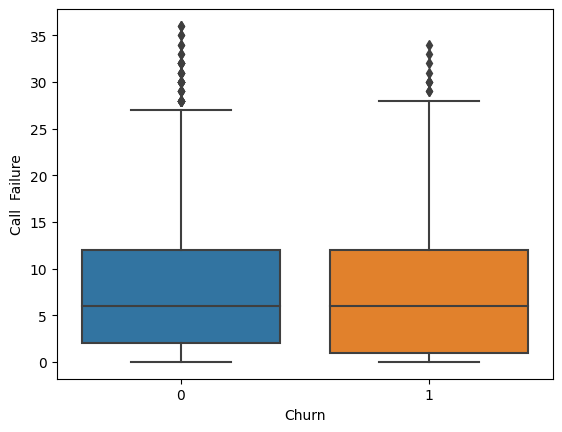

In [ ]:
import seaborn as sns
sns.boxplot(data=df, x='Churn', y='Call  Failure')

<Axes: xlabel='Churn', ylabel='Subscription  Length'>

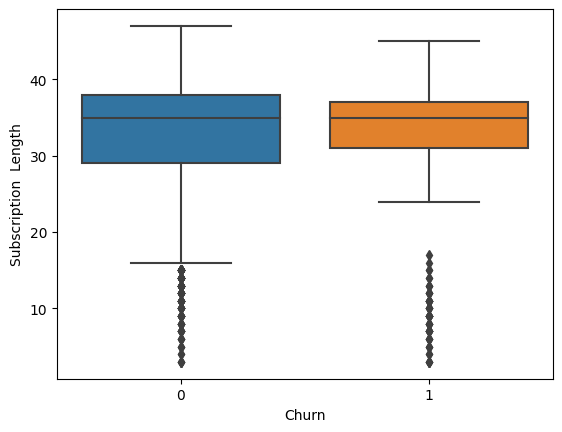

In [ ]:
sns.boxplot(data=df, x='Churn', y='Subscription  Length')

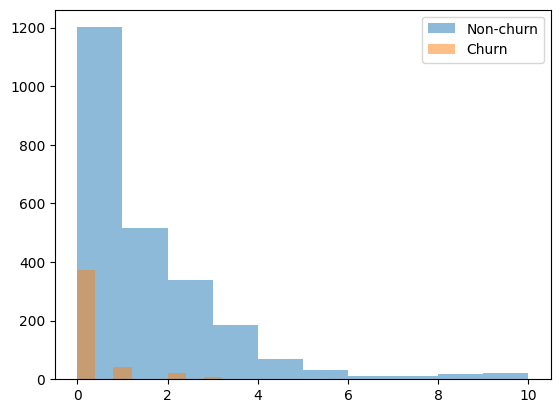

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df[df['Churn'] == 0]['Charge  Amount'], alpha=0.5, label='Non-churn')
plt.hist(df[df['Churn'] == 1]['Charge  Amount'], alpha=0.5, label='Churn')
plt.legend()

#***Pair plot***

A grid of axis is created by this function to display the pairwise relationship between the features in the dataset. The row's y-axis and column's x-axis are utilized to plot the correlation between each feature.

In [ ]:
# Pair Plot of the Data Set
sb.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

#***Scatter Plot***

This plot shows how two sets of data are related to each other.

#***Scatter Plot of Churn and Age Group***

Text(0.5, 0, 'Churn')

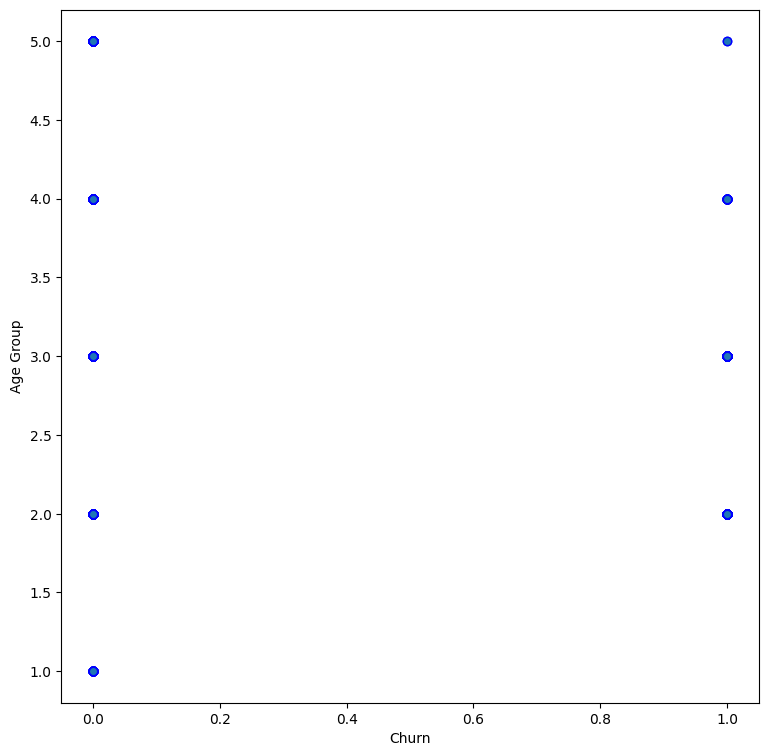

In [ ]:
# Scatter Plot of Duration and Amount
plt.figure(figsize = [9, 9])
plt.scatter(y = 'Age Group', x = 'Churn', edgecolor = 'blue', data = df)
plt.ylabel('Age Group')
plt.xlabel('Churn')

#***Correlation Plot***

The correlation plot is a visual representation of the correlation coefficient between variables, which is displayed in the form of a matrix-like table. To visualize the correlation between variables, we use the seaborn library to plot the correlation plot. This plot displays a one-to-one relationship between variables, with each variable showing its relationship with another variable. Upon observing the heatmap, we can see that Duration has a strong correlation with Age.

In [ ]:
df.corr()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
Call Failure,1.000000,0.149564,0.177206,0.585442,0.495463,0.567096,-0.031926,0.498604,0.049340,0.187537,-0.094090,0.043799,0.110228,0.003310
Complains,0.149564,1.000000,-0.019229,-0.035887,-0.108934,-0.095519,-0.114729,-0.061314,0.015761,0.002461,0.282928,-0.000400,-0.136989,0.546055
Subscription Length,0.177206,-0.019229,1.000000,0.084275,0.127184,0.109148,0.080530,0.099215,0.030078,-0.160538,0.144235,0.005900,0.113184,-0.037984
Charge Amount,0.585442,-0.035887,0.084275,1.000000,0.443585,0.372646,0.085781,0.413897,0.282761,0.321193,-0.353311,0.283466,0.161852,-0.201662
Seconds of Use,0.495463,-0.108934,0.127184,0.443585,1.000000,0.945144,0.093073,0.671973,0.015253,0.127793,-0.449660,0.019383,0.408536,-0.295999
Frequency of use,0.567096,-0.095519,0.109148,0.372646,0.945144,1.000000,0.090712,0.731204,-0.039523,0.199873,-0.440601,-0.031574,0.394647,-0.298608
Frequency of SMS,-0.031926,-0.114729,0.080530,0.085781,0.093073,0.090712,1.000000,0.069717,-0.056859,0.193785,-0.288049,-0.093235,0.922852,-0.218894
Distinct Called Numbers,0.498604,-0.061314,0.099215,0.413897,0.671973,0.731204,0.069717,1.000000,0.015562,0.167037,-0.393052,0.049187,0.275447,-0.270343
Age Group,0.049340,0.015761,0.030078,0.282761,0.015253,-0.039523,-0.056859,0.015562,1.000000,-0.153496,0.020048,0.960877,-0.193461,-0.005891
Tariff Plan,0.187537,0.002461,-0.160538,0.321193,0.127793,0.199873,0.193785,0.167037,-0.153496,1.000000,-0.163083,-0.120429,0.249999,-0.106000


<Axes: >

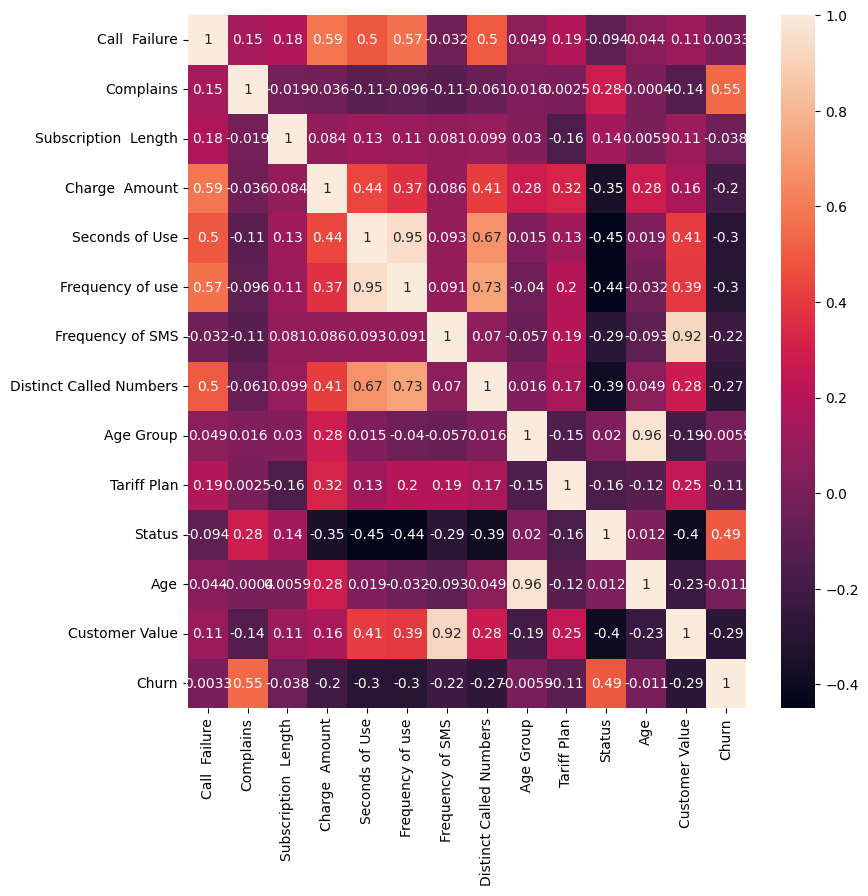

In [ ]:
plt.figure(figsize = [9, 9])
# Ploting Correlation Plot
sb.heatmap(df.corr(), annot = True)

#***Applying Classification***
Classification in a project involves sorting or categorizing data or items into predefined groups based on their characteristics. It's a fundamental process used in various applications, such as sorting emails into spam and non-spam, classifying text sentiment, or identifying diseases from medical test results. This helps in data organization and decision-making.

#***Splitting the Data***
To split the training and testing parts, we can use the scikit-learn module train_test_split

In [ ]:
x = df[['Customer Value', 'Age', 'Tariff Plan', 'Age Group', 'Distinct Called Numbers', 'Frequency of SMS', 'Frequency of use', 'Seconds of Use', 'Complains']]
y = df['Churn']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 42)

#***Applying model***
Using a model in a project means putting the model's insights or predictions into practical use to achieve the project's objectives. This may include making real-time decisions, automating specific processes, improving efficiency, and ultimately delivering value to the organization or end-users. It is crucial to continually assess and update the applied model to ensure its accuracy and relevance in changing circumstances.

#***Logistic Regression***

In [ ]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
ypred = model.predict(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8982456140350877
mean_absolute_error: 0.10175438596491228
mean_squared_error: 0.10175438596491228
Confusion matrix:
 [[474   5]
 [ 53  38]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       479
           1       0.88      0.42      0.57        91

    accuracy                           0.90       570
   macro avg       0.89      0.70      0.75       570
weighted avg       0.90      0.90      0.88       570



# **SVM**

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9140350877192982
mean_absolute_error: 0.08596491228070176
mean_squared_error: 0.08596491228070176
Confusion matrix:
 [[465  14]
 [ 35  56]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       479
           1       0.80      0.62      0.70        91

    accuracy                           0.91       570
   macro avg       0.86      0.79      0.82       570
weighted avg       0.91      0.91      0.91       570



#***Decision Tree***

In [ ]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
ypred = model.predict(xtest)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(max_depth=3 , criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8982456140350877
mean_absolute_error: 0.10175438596491228
mean_squared_error: 0.10175438596491228
Confusion matrix:
 [[474   5]
 [ 53  38]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       479
           1       0.88      0.42      0.57        91

    accuracy                           0.90       570
   macro avg       0.89      0.70      0.75       570
weighted avg       0.90      0.90      0.88       570



#***Random Forest Classifier***

In [ ]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
ytest = model.predict(xtest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8964912280701754
mean_absolute_error: 0.10350877192982456
mean_squared_error: 0.10350877192982456
Confusion matrix:
 [[474   5]
 [ 54  37]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       479
           1       0.88      0.41      0.56        91

    accuracy                           0.90       570
   macro avg       0.89      0.70      0.75       570
weighted avg       0.90      0.90      0.88       570



#***KNN***

In [ ]:
ytest = model.predict(xtest)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8491228070175438
mean_absolute_error: 0.15087719298245614
mean_squared_error: 0.15087719298245614
Confusion matrix:
 [[447  32]
 [ 54  37]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       479
           1       0.54      0.41      0.46        91

    accuracy                           0.85       570
   macro avg       0.71      0.67      0.69       570
weighted avg       0.84      0.85      0.84       570



#***K-Means Clusterings***

In [ ]:
k = 3
kmeans = KMeans(n_clusters = k)
clusters = kmeans.fit_predict(xtest)

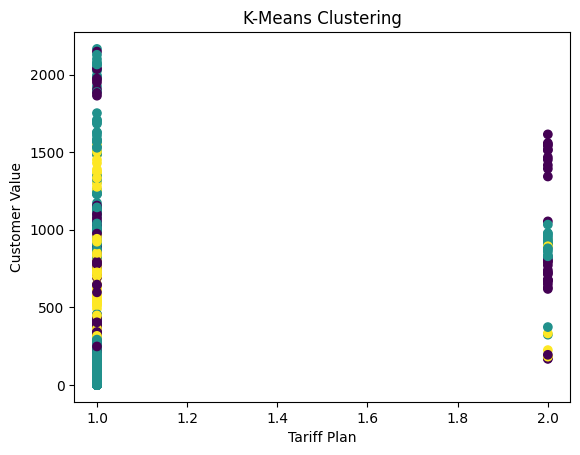

In [ ]:
plt.scatter(xtest['Tariff Plan'], xtest['Customer Value'], c=clusters, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Tariff Plan")
plt.ylabel("Customer Value")
plt.show()

In [ ]:
centroids = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# **Ada Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.8929824561403509
mean_absolute_error: 0.10701754385964912
mean_squared_error: 0.10701754385964912
Precision: 0.8409090909090909
Recall: 0.4065934065934066
F1-score: 0.5481481481481482


#***XG Boost***

In [ ]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"mean_absolute_error:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9263157894736842
mean_absolute_error:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       479
           1       0.89      0.62      0.73        91

    accuracy                           0.93       570
   macro avg       0.91      0.80      0.84       570
weighted avg       0.92      0.93      0.92       570



In [ ]:
# Create an XGBoost classifier
model = XGBClassifier()
# Train the model
model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)